In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("/home/inventor/Datasets/Boston house/boston.csv")

In [3]:
df.shape

(506, 14)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [18]:
corr_matrix = df.corr()

corr_matrix["MEDV"] = corr_matrix["MEDV"].sort_values(ascending=False)

corr_matrix["MEDV"]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

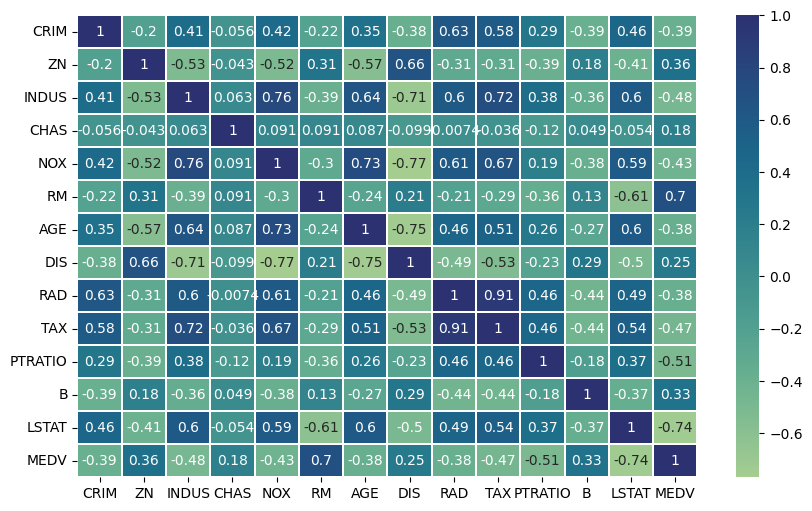

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap=sns.color_palette("crest", as_cmap=True), linewidths=0.2, annot=True)
plt.show()

<Axes: >

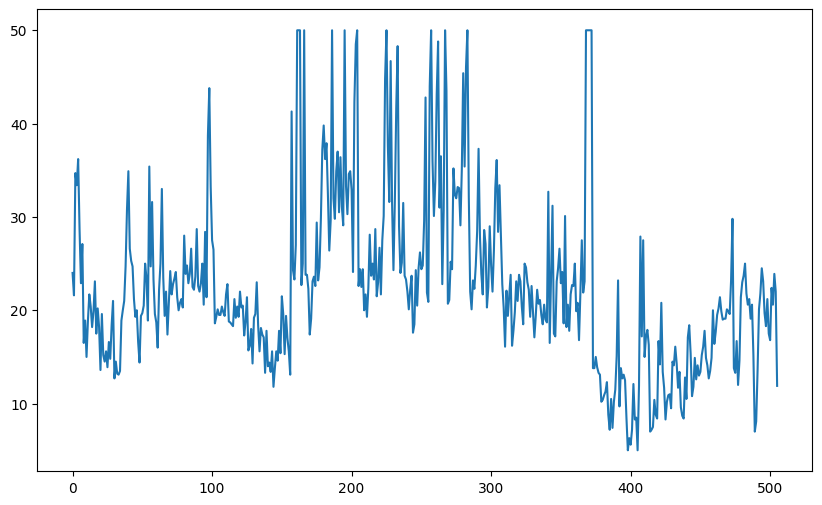

In [24]:
plt.figure(figsize=(10, 6))
df["MEDV"].plot()

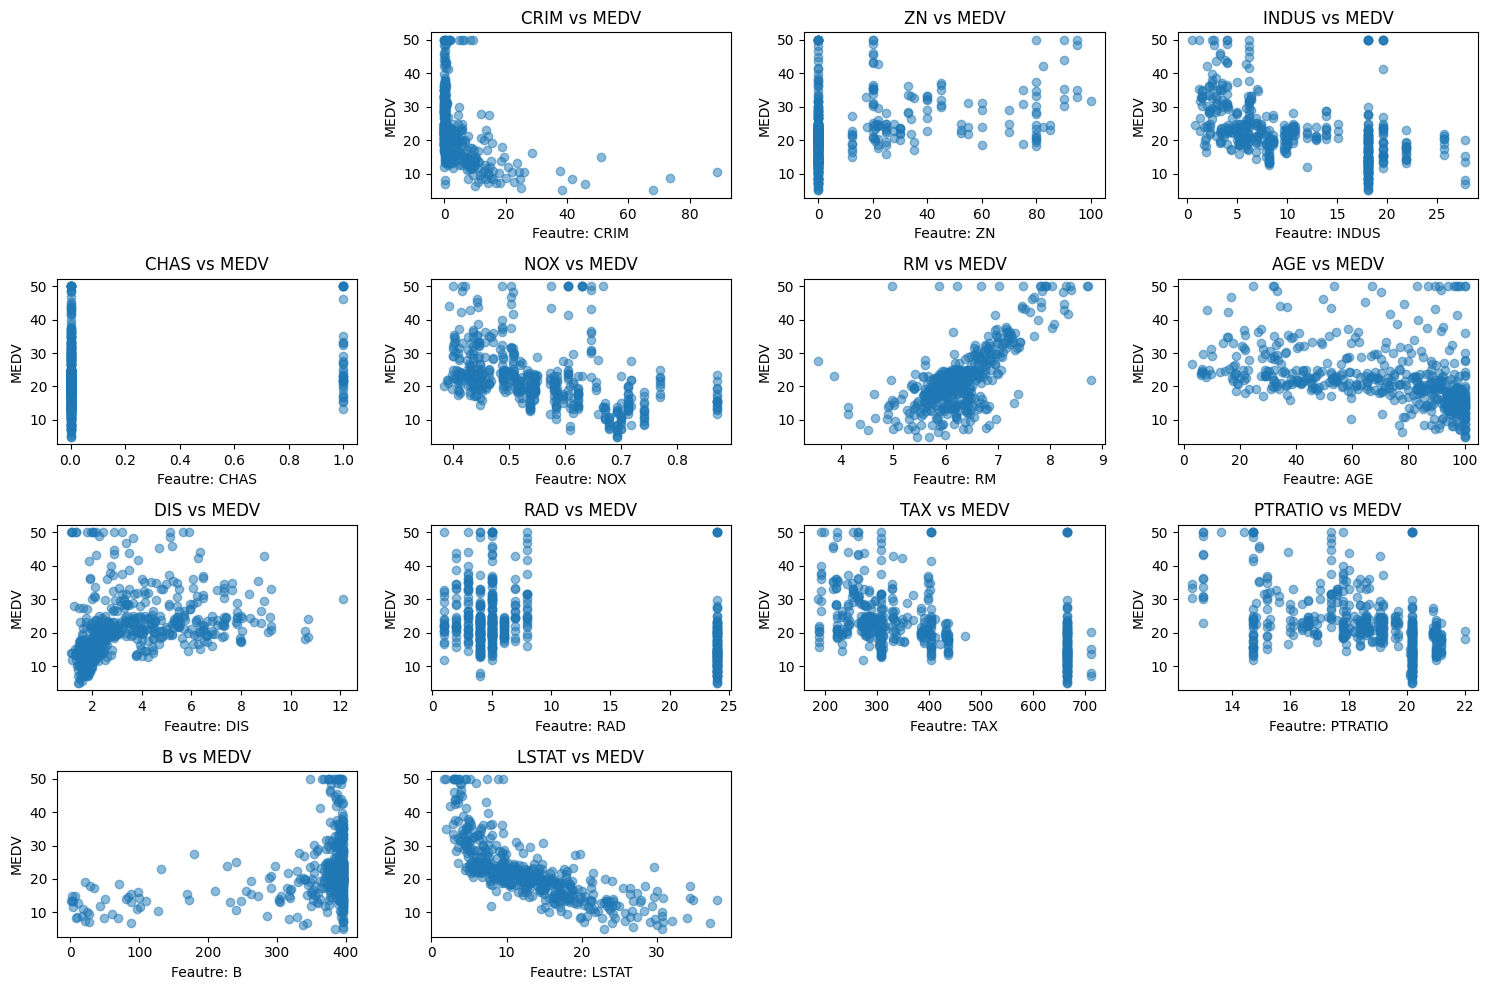

In [80]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[:-1]):

    plt.subplot(4, 4, i+2)
    plt.scatter(df[feature], df["MEDV"], alpha=0.5)
    plt.title(f"{feature} vs MEDV")
    plt.xlabel(f"Feautre: {feature}")
    plt.ylabel(f"MEDV")
plt.tight_layout()
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("MEDV", axis=1), df["MEDV"], test_size=0.2, random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_sk = lr.predict(X_test)

In [83]:
def r2_score(y_true, y_pred):

    mean_value = np.mean(y_true)

    SSE = np.sum((y_true - y_pred) ** 2)
    TSS = np.sum((y_true - mean_value) ** 2)

    r2_score  = 1 - (SSE / TSS)
    return r2_score

In [84]:
r2_score_sk = r2_score(y_test, y_pred_sk)
r2_score_sk

np.float64(0.6687594935356326)

In [87]:
lr.coef_, lr.intercept_

(array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]),
 np.float64(30.24675099392366))

In [85]:
class Multiple_Linear_Regression():

    def __init__(self):

        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        self.coef_ = betas[1:]
        self.intercept_ = betas[0]

        print(f"Coef_ : {self.coef_}, Intercept_: {self.intercept_}")
    
    def predict(self, X_test):

        y_pred = self.intercept_ + np.dot(X_test, self.coef_)
        return y_pred

In [86]:
mlr = Multiple_Linear_Regression()

mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

Coef_ : [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01], Intercept_: 30.246750993891453


In [88]:
r2_score_c = r2_score(y_test, y_pred)
r2_score_c

np.float64(0.6687594935355755)

Text(0.5, 1.0, 'Coef')

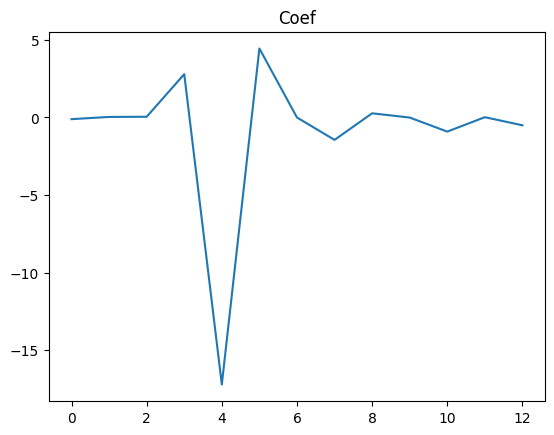

In [92]:
plt.plot(mlr.coef_)
plt.title('Coef')

In [89]:
from sklearn.metrics import mean_squared_error

mean_squared_error_sk = mean_squared_error(y_test, y_pred_sk)

mean_squared_error_c = mean_squared_error(y_test, y_pred)


print(f"Mean Squared Error SK: {mean_squared_error_sk}")
print(f"Mean Squared Error Custom: {mean_squared_error_c}")

Mean Squared Error SK: 24.291119474973478
Mean Squared Error Custom: 24.29111947497766
